In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Statistiques descriptives

En première analyse et afin de se familiariser avec les données obtenues avec le datascraping, nous allons faire quelques statistiques descriptives sur notre base de données

In [3]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df_questions = pd.read_csv('/Users/iokanaanbelfis-simon/PythonPourLaDataScience/Datascrapping/data.csv', encoding='latin-1', sep='|')

# Afficher les premières lignes du DataFrame
print(df_questions.head())

print(df_questions.columns)

   id                                            groupe  \
0   1  Libertés, Indépendants, Outre-mer et Territoires   
1   2                                  Les Républicains   
2   3                 Démocrate (MoDem et Indépendants)   
3   4                                       Renaissance   
4   5  Libertés, Indépendants, Outre-mer et Territoires   

                       nom                                ministère_interrogé  \
0   M. Christophe Naegelen            Agriculture et souveraineté alimentaire   
1        M. Pierre Cordier  Transition écologique et cohésion des territoires   
2        M. Frédéric Petit                                             Armées   
3  Mme Marie-Pierre Rixain                                    Comptes publics   
4   M. Christophe Naegelen                    Éducation nationale et jeunesse   

                rubrique                                              titre  \
0                animaux   Cohabitation entre les randonneurs et les patous   


In [4]:
def compte_occurrences_par_valeur(data_frame, nom_colonne, valeurs_possibles):
    """
    Renvoie une liste avec le nombre d'occurrences de chaque valeur dans une colonne du DataFrame.

    Args:
    - data_frame (pd.DataFrame): Le DataFrame pandas.
    - nom_colonne (str): Le nom de la colonne pour laquelle compter les occurrences.
    - valeurs_possibles (list): Liste des valeurs possibles.

    Returns:
    - list: Liste du nombre d'occurrences pour chaque valeur.
    """
    if nom_colonne in data_frame.columns:
        occurrences = [data_frame[data_frame[nom_colonne] == valeur].shape[0] for valeur in valeurs_possibles]
        return occurrences
    else:
        raise ValueError(f"La colonne {nom_colonne} n'existe pas dans le DataFrame.")

# Répartition des questions par groupe politique

Pour débuter, nous allons nous interesser à la proportion de questions aux gouvernements écrites en fonction de l'appartenance à un groupe politique




['Libertés, Indépendants, Outre-mer et Territoires', 'Les Républicains', 'Démocrate (MoDem et Indépendants)', 'Renaissance', 'Gauche démocrate et républicaine - NUPES', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'Rassemblement National', 'Horizons et apparentés', 'Écologiste - NUPES', 'Socialistes et apparentés', 'Non inscrit']
<class 'list'>


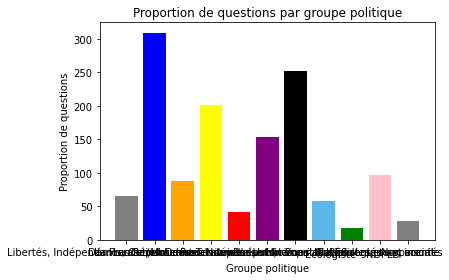

In [5]:
groupes_politiques = df_questions['groupe'].unique().tolist()
# liste qui comprend le nom de chaque groupe politique

nb_questions_gp_politique = compte_occurrences_par_valeur(df_questions, 'groupe', groupes_politiques)
# liste qui contient, pour chaque groupe politique, le nombre de questions posées présentes dans le dataframe)

print(groupes_politiques)
print(type(nb_questions_gp_politique))

import matplotlib.pyplot as plt

groupes_politiques = [str(element) for element in groupes_politiques]

#On définit une couleur bleu clair pour le groupe horizon

import colorsys

def obtenir_bleu_clair():
    """
    Retourne une couleur bleu clair au format hexadécimal.

    Returns:
    - str: Couleur bleu clair au format hexadécimal.
    """
    # Définir la teinte (H), la saturation (S), et la valeur (V)
    teinte_bleu_clair = 200  # Teinte bleu
    saturation = 0.6
    luminosite = 0.9

    # Convertir de HSV à RGB
    rgb_bleu_clair = colorsys.hsv_to_rgb(teinte_bleu_clair/360, saturation, luminosite)

    # Convertir de RGB à hexadécimal
    couleur_hex_bleu_clair = "#{:02X}{:02X}{:02X}".format(
        int(rgb_bleu_clair[0] * 255),
        int(rgb_bleu_clair[1] * 255),
        int(rgb_bleu_clair[2] * 255)
    )

    return couleur_hex_bleu_clair
couleur_bleu_clair = obtenir_bleu_clair()

couleurs_groupes = ['grey','blue', 'orange', 'yellow', 'red', 'purple','black', couleur_bleu_clair,'green','pink','grey','grey']
plt.bar(groupes_politiques, nb_questions_gp_politique, color=couleurs_groupes)
plt.xlabel('Groupe politique')
plt.ylabel('Proportion de questions')
plt.title('Proportion de questions par groupe politique')
plt.show()



# Répartition des question par thématique : rubrique et ministère

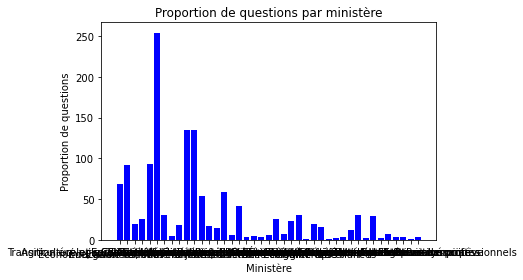

In [6]:
ministères = df_questions['ministère_interrogé'].unique().tolist()
# liste qui comprend le nom de chaque ministère auquel au moins une des questions contenues dans le DataFrame est adressée

nb_questions_ministère = compte_occurrences_par_valeur(df_questions, 'ministère_interrogé', ministères)
# liste qui contient, pour chaque ministère, le nombre de questions présentes dans le dataframe qui lui est adressée)

ministères = [str(element) for element in ministères]

import matplotlib.pyplot as plt

plt.bar(ministères, nb_questions_ministère, color= "blue")
plt.xlabel('Ministère')
plt.ylabel('Proportion de questions')
plt.title('Proportion de questions par ministère')
plt.show()

In [7]:
data_frame = pd.DataFrame({'Ministère':ministères , 'Nombre de questions': nb_questions_ministère })
tableau = tabulate(data_frame, headers='keys', tablefmt='grid', showindex=False)
print(tableau)

NameError: name 'tabulate' is not defined

## Nuages de mots


In [8]:
pip install --upgrade pip
pip install --upgrade Pillow

pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt


In [10]:
df_questions.head()

,id,groupe,nom,ministère_interrogé,rubrique,titre,date,question
0,1,"Libertés, Indépendants, Outre-mer et Territoires",M. Christophe Naegelen,Agriculture et souveraineté alimentaire,animaux,Cohabitation entre les randonneurs et les patous,05/07/2022,M. Christophe Naegelen interroge M. le ministr...
1,2,Les Républicains,M. Pierre Cordier,Transition écologique et cohésion des territoires,chasse et pêche,Pratique de la vénerie sous terre pour la régu...,05/07/2022,M. Pierre Cordier appelle l'attention de Mme l...
2,3,Démocrate (MoDem et Indépendants),M. Frédéric Petit,Armées,défense,Défense - Union européenne - SCAF - MGCS - coo...,05/07/2022,M. Frédéric Petit appelle l'attention de M. le...
3,4,Renaissance,Mme Marie-Pierre Rixain,Comptes publics,eau et assainissement,Recouvrement des impayés de redevances d'assai...,05/07/2022,Mme Marie-Pierre Rixain appelle l'attention de...
4,5,"Libertés, Indépendants, Outre-mer et Territoires",M. Christophe Naegelen,Éducation nationale et jeunesse,enseignement,Conditions d'embauche d'assistants d'éducation...,05/07/2022,M. Christophe Naegelen interroge M. le ministr...


In [38]:
questions = " ".join(df_questions["question"])

def clean_text(text):
    text = text.lower() 
    text = " ".join(text.split())
    return text

questions = clean_text(questions)
questions

'm. christophe naegelen interroge m. le ministre de l\'agriculture et de la souveraineté alimentaire sur le statut particulier des « patous » communément appelés chiens de berger ainsi que sur les dispositifs mis en place pour permettre la cohabitation entre les randonneurs et les patous. les chiens de berger protègent les troupeaux et ne sont pas considérés comme divaguant lorsqu\'ils se trouvent sans laisse et à distance de leur maître depuis la loi n° 2005-157 du 23 février 2005 qui a modifié l\'article l. 211-23 du code rural. désormais, la loi libère « de toute poursuite pénale pour divagation, l\'éleveur ou le propriétaire d\'un chien affecté à la protection du troupeau (« patous ») ou à la garde de celui-ci (chien de conduite) ». des études ont montré que les patous ne sont pas dangereux pour les hommes, ces chiens sont dressés pour dissuader et non pour blesser. néanmoins, des cas d\'agressions sont recensés et une forte part des randonneurs sont inquiets de croiser ces chiens.

In [67]:
occurrences = WordCloud().process_text(questions)

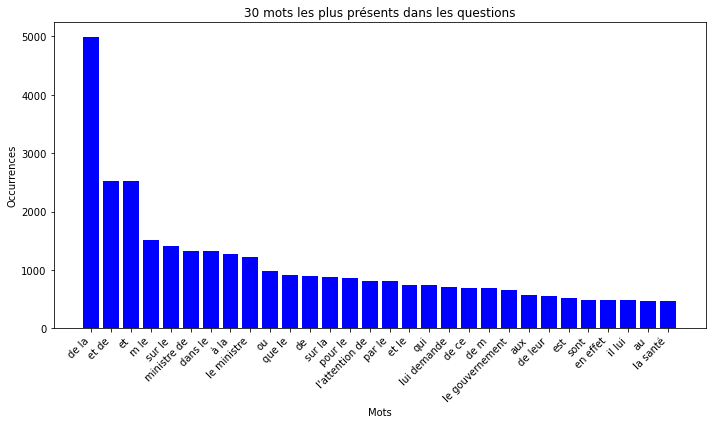

In [72]:
import matplotlib.pyplot as plt

def plot_top_n_keys(dictionary, n):
    # Sort the dictionary by values in descending order
    sorted_items = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

    # Take the top N items
    top_n_items = sorted_items[:n]

    # Extract keys and values for plotting
    keys, values = zip(*top_n_items)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='blue')
    plt.xlabel('Mots')
    plt.ylabel('Occurrences')
    plt.title(f'{n} mots les plus présents dans les questions')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a dictionary named 'word_count' from the previous example
plot_top_n_keys(occurrences, n=30)


(-0.5, 959.5, 865.5, -0.5)

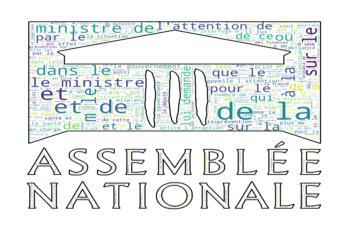

In [51]:


img = "https://upload.wikimedia.org/wikipedia/commons/a/ad/FRNationalAssemblyLogo.png"
an_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))

wc = wordcloud.WordCloud(background_color="white", max_words=10000, mask=an_mask, contour_width=2, contour_color='black').generate(questions)


plt.imshow(wc, interpolation='bilinear', aspect='auto')
plt.axis("off")

